# アンサンブル学習

In [7]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=42ebca68262621d9d1b7352c26e8abba2070ecac6140f8101196319845272223
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [8]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import japanize_matplotlib

# mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prepare data
restaurantData = pd.read_csv("/content/drive/MyDrive/data/restaurant.csv", encoding="UTF-8")

# check data
restaurantData.head(3)

,店名,ランチ価格(円),料理区分,カロリー,味濃い,見た目,ゆっくり座れる,好き
0,ごんべえ,600,うどん,430,3,3,3,0
1,subway,450,サンドイッチ,350,1,3,2,1
2,天丼てんや,550,天麩羅,640,3,2,2,0


In [3]:
# get x and y
x1 = restaurantData[['ランチ価格(円)', 'カロリー', '味濃い', '見た目', 'ゆっくり座れる']]
x2 = restaurantData[['料理区分']]
x2 = pd.get_dummies(x2, drop_first=True)
x = pd.concat([x1, x2],axis=1)

y = restaurantData[['好き']]

# split train and test data
xTrain, xTest, yTrain, yTest = train_test_split(x, y,stratify=y,random_state=0,test_size=0.2)

# check data
print(xTrain.head())
print(yTrain.head())

    ランチ価格(円)  カロリー  味濃い  見た目  ゆっくり座れる  料理区分_とんかつ  料理区分_まぜそば  料理区分_カレー  \
18       700   430    2    4        3          0          0         0   
22      1600   900    3    5        3          0          0         0   
10       850   600    4    3        1          0          0         0   
3        850   900    5    1        5          0          0         0   
9        700   600    4    4        1          0          0         0   

    料理区分_サンドイッチ  料理区分_タイ  料理区分_ラーメン  料理区分_中国  料理区分_天麩羅  料理区分_定食  料理区分_油そば  \
18            0        0          0        0         0        0         0   
22            0        0          0        0         0        0         0   
10            0        0          0        0         0        0         1   
3             0        0          0        1         0        0         0   
9             0        0          0        0         0        0         1   

    料理区分_肉  
18       0  
22       1  
10       0  
3        0  
9        0  
    好き
18   1
22   1

## 決定木による分析

In [4]:
# define model (decision tree)
treeModel = DecisionTreeClassifier(random_state=0,max_depth=4)

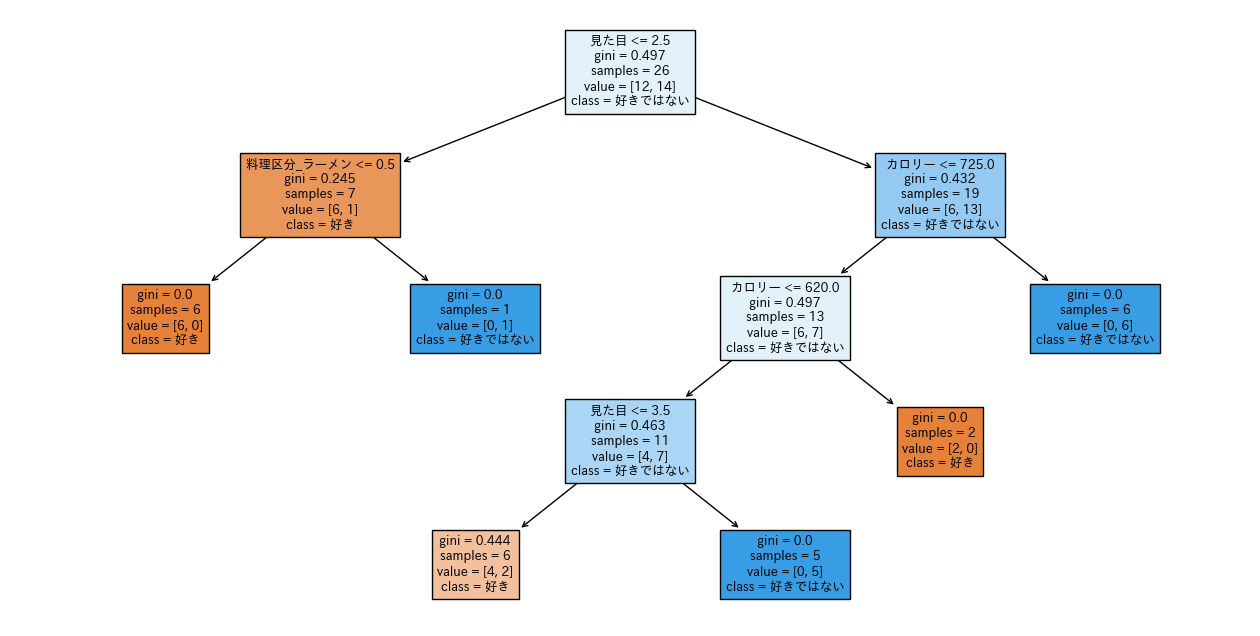

In [9]:
# fit all data to the model
treeModel.fit(x, y)

# plot tree
fig_dt = plt.figure(figsize=(16,8))
ax_dt = fig_dt.add_subplot(111)
plot_tree(treeModel, feature_names=list(x.columns), class_names=['好き','好きではない'], filled=True,fontsize=9,ax = ax_dt)
plt.show()

In [ ]:
# fit splited data to the model
treeModel.fit(xTrain, yTrain)

# predict
yTreePred = treeModel.predict(xTest)

# print result
print('正解率:', accuracy_score(yTest, yTreePred))
print('適合率:', precision_score(yTest, yTreePred))
print('再現率:', recall_score(yTest, yTreePred))
print('f1 Score:', f1_score(yTest, yTreePred))

正解率: 0.8333333333333334
適合率: 1.0
再現率: 0.6666666666666666
f1 Score: 0.8


## ランダムフォレストによる分析

In [ ]:
rfModel = RandomForestClassifier(n_estimators=2, max_depth=4, criterion='gini', random_state=90) 

rfModel.fit(xTrain, yTrain.values.ravel())

yRfPred = rfModel.predict(xTest)

print('正解率:',accuracy_score(yTest, yRfPred))
print('適合率:',precision_score(yTest, yRfPred))
print('再現率:',recall_score(yTest, yRfPred))
print('f1:',f1_score(yTest, yRfPred))

正解率: 0.6666666666666666
適合率: 1.0
再現率: 0.3333333333333333
f1: 0.5


## ブースティングによる分析 (Adaboost)

In [ ]:
adaModel = AdaBoostClassifier(learning_rate=0.6, random_state=0)
    
adaModel.fit(xTrain, yTrain.values.ravel())
    
yAdaPred = adaModel.predict(xTest)

print('正解率:',accuracy_score(yTest, yAdaPred))
print('適合率:',precision_score(yTest, yAdaPred))
print('再現率:',recall_score(yTest, yAdaPred))
print('f1:',f1_score(yTest, yAdaPred))

正解率: 0.5
適合率: 0.5
再現率: 1.0
f1: 0.6666666666666666
